In [19]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


from gp_fijando_operaciones import *

In [20]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [21]:
funcdict = {
	'add' : 5,
	'sub' : 5,
	'mul' : 4,
	'div' : 4,
	'inv' : 1,
	'log' : 3,
	'max' : 1,
	'min' : 1,
	'sqrt' : 2,
	'exp' : 1,
	'floor': 2
}

#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=100)
res

c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
Progress: 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]


{'total_generations': 100,
 'best_trees': array([Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div

**Mejor fitness con y sin penalización**

In [22]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.259238031910175
best fitness penalizado:	2.418965871274013


In [23]:
#(res["best_trees"][0]).pprint()

**Gráfica árbol**

In [24]:
(res["best_trees"][-1]).pprint()


  div__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                                                                                                                                                                                                                                                                     \
x                  ___________________________________________________________________________________________________________________________________________________________________

In [25]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

**Ecuación**

In [26]:
print(res['best_trees'][-1])

div(x,sub(div(log(log(x)),sub(0.8401224097479643,sub(div(div(1.298247288472054,sub(0.8401224097479643,log(sub(1.7655784852338372,sub(div(log(sub(1.7655784852338372,sub(div(log(log(x)),sub(log(log(x)),log(x))),sub(1.7655784852338372,log(x))))),sub(inv(x),log(x))),sub(1.4075680906001395,log(x))))))),sub(1.7655784852338372,log(log(x)))),sub(log(sub(1.7655784852338372,sub(div(log(log(x)),sub(log(log(x)),log(x))),sub(1.7655784852338372,log(x))))),log(x))))),sub(0.8401224097479643,log(x))))


**Gráficos**

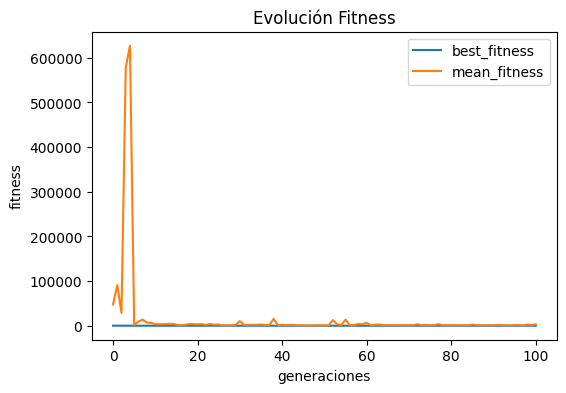

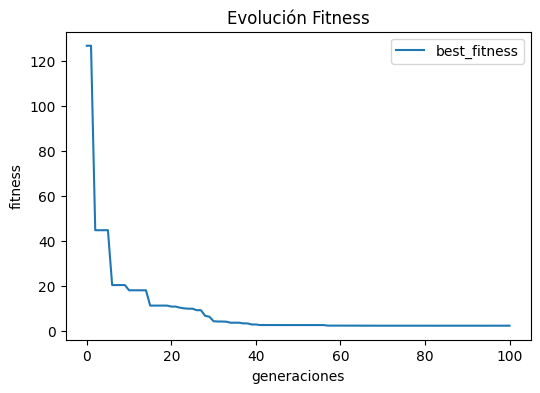

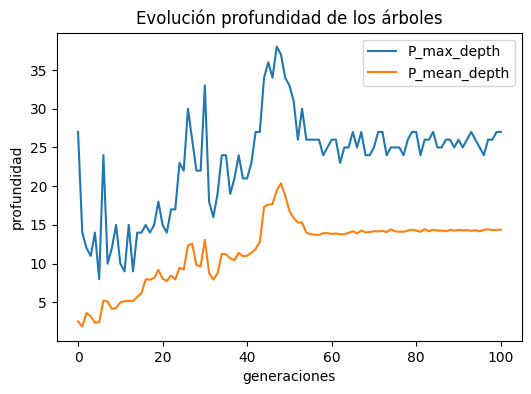

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()